<a href="https://colab.research.google.com/github/mrneerajnegi/Data-Science-Projects/blob/analzing_whatsapp_chat/Whatsapp_text_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install urlextract

In [7]:
pip install wordcloud

In [8]:
pip install emoji

In [9]:
import pandas as pd
import numpy as np
import re
from urlextract import URLExtract
import seaborn as sbn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji
from collections import Counter

In [10]:
sender="Negi"
f =open("./_chat.txt",encoding="utf-8")
data=f.read()

In [11]:
### Preprocessing

In [12]:
dummy=data.split("\n")
dummy[:20]

['[05/11/17, 5:23:31 PM] Yaariyan: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.',
 '[05/11/17, 5:23:31 PM] \u200eDeepak Rao created this group',
 '[05/11/17, 5:23:31 PM] \u200eYou were added',
 '[05/10/21, 9:46:45 PM] Deepak Rao: Bhai mzak krre the yrr',
 '[05/10/21, 9:46:54 PM] Deepak Rao: Veg mommos hi the',
 '[05/10/21, 9:47:04 PM] Deepak Rao: Tu chla hi gya yrr',
 '[05/10/21, 9:47:15 PM] Deepak Rao: Pndt',
 '[05/10/21, 9:52:50 PM] Deepak Rao: Teri ksm yrr',
 '[05/10/21, 9:52:55 PM] Deepak Rao: Manja ab',
 '[05/10/21, 9:56:18 PM] Deepak Rao: Boss Dk',
 '[05/10/21, 9:56:44 PM] Deepak Rao: O Boss',
 '[05/10/21, 9:56:47 PM] Deepak Rao: Dk',
 '[05/10/21, 9:57:10 PM] Deepak Rao: Dekh gali b respect c dera hu',
 '[05/10/21, 10:00:21 PM] Negi: 💁',
 '\u200e[05/10/21, 10:01:27 PM] Joshi A: \u200eimage omitted',
 '[05/10/21, 10:02:43 PM] Negi: Ghumne ki bat kr ra th',
 '[05/10/21, 10:03:44 PM] Deepak Rao: Kya hu

In [13]:
pattern="[\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[A-Z]+]"
messages=re.split(pattern,data)[2:]
messages

[' \u200eDeepak Rao created this group',
 ' \u200eYou were added',
 ' Deepak Rao: Bhai mzak krre the yrr',
 ' Deepak Rao: Veg mommos hi the',
 ' Deepak Rao: Tu chla hi gya yrr',
 ' Deepak Rao: Pndt',
 ' Deepak Rao: Teri ksm yrr',
 ' Deepak Rao: Manja ab',
 ' Deepak Rao: Boss Dk',
 ' Deepak Rao: O Boss',
 ' Deepak Rao: Dk',
 ' Deepak Rao: Dekh gali b respect c dera hu',
 ' Negi: 💁\n\u200e',
 ' Joshi A: \u200eimage omitted',
 ' Negi: Ghumne ki bat kr ra th',
 ' Deepak Rao: Kya hua jal gya??',
 ' Joshi A: Nhi to',
 ' Deepak Rao: Kon??',
 ' Joshi A: Kon',
 ' Deepak Rao: Ye ankit lgra hai',
 ' Deepak Rao: Kbka h plan??',
 ' Joshi A: Yes',
 ' Negi: @919779908708  tra vo pila kurta tre pas hi h na',
 ' Negi: Jo kangaru n dala th',
 ' Joshi A: 2 h',
 ' Joshi A: 1 to h..dusra ptani..dekhna pdega ghar m',
 ' Negi: Bol dio ek br dkhne ko',
 ' Negi: Kal le aunga',
 ' Negi: Or ghr p cards pde h ajkal?',
 ' Joshi A: Okay',
 ' Joshi A: Ghr hi pta kr .bhai se mere',
 ' Negi: Ok',
 ' Deepak Rao: Kha ja

In [14]:
pattern="\d{2}/\d{2}/\d{2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[A-Z]+"
dates=re.findall(pattern,data)[1:]
dates

['05/11/17, 5:23:31 PM',
 '05/11/17, 5:23:31 PM',
 '05/10/21, 9:46:45 PM',
 '05/10/21, 9:46:54 PM',
 '05/10/21, 9:47:04 PM',
 '05/10/21, 9:47:15 PM',
 '05/10/21, 9:52:50 PM',
 '05/10/21, 9:52:55 PM',
 '05/10/21, 9:56:18 PM',
 '05/10/21, 9:56:44 PM',
 '05/10/21, 9:56:47 PM',
 '05/10/21, 9:57:10 PM',
 '05/10/21, 10:00:21 PM',
 '05/10/21, 10:01:27 PM',
 '05/10/21, 10:02:43 PM',
 '05/10/21, 10:03:44 PM',
 '05/10/21, 10:03:56 PM',
 '05/10/21, 10:03:57 PM',
 '05/10/21, 10:04:02 PM',
 '05/10/21, 10:04:46 PM',
 '05/10/21, 10:06:05 PM',
 '05/10/21, 10:06:35 PM',
 '07/10/21, 9:03:01 PM',
 '07/10/21, 9:03:06 PM',
 '07/10/21, 9:03:19 PM',
 '07/10/21, 9:03:44 PM',
 '07/10/21, 9:05:04 PM',
 '07/10/21, 9:05:12 PM',
 '07/10/21, 9:05:19 PM',
 '07/10/21, 9:05:20 PM',
 '07/10/21, 9:06:00 PM',
 '07/10/21, 9:06:11 PM',
 '07/10/21, 10:37:46 PM',
 '07/10/21, 10:37:49 PM',
 '07/10/21, 11:45:42 PM',
 '07/10/21, 11:49:12 PM',
 '07/10/21, 11:49:33 PM',
 '09/10/21, 4:33:56 PM',
 '09/10/21, 4:34:02 PM',
 '09/10/21

In [15]:
df=pd.DataFrame({"messages":messages,"date":dates})

def getSenderName(msg):
    name=msg.split(":")
    if name[1:]:
        return name[0].strip()
    else:
        return "Group Notification"
def getMsg(msg):
    name=msg.split(":")
    if name[1:]:
        return name[1]
    else:
        return name[0]
df["sender"]=df["messages"].apply(getSenderName)
df["messages"]=df["messages"].apply(getMsg)

df.head(10)

,messages,date,sender
0,‎Deepak Rao created this group,"05/11/17, 5:23:31 PM",Group Notification
1,‎You were added,"05/11/17, 5:23:31 PM",Group Notification
2,Bhai mzak krre the yrr,"05/10/21, 9:46:45 PM",Deepak Rao
3,Veg mommos hi the,"05/10/21, 9:46:54 PM",Deepak Rao
4,Tu chla hi gya yrr,"05/10/21, 9:47:04 PM",Deepak Rao
5,Pndt,"05/10/21, 9:47:15 PM",Deepak Rao
6,Teri ksm yrr,"05/10/21, 9:52:50 PM",Deepak Rao
7,Manja ab,"05/10/21, 9:52:55 PM",Deepak Rao
8,Boss Dk,"05/10/21, 9:56:18 PM",Deepak Rao
9,O Boss,"05/10/21, 9:56:44 PM",Deepak Rao


In [16]:
df["date"]=pd.to_datetime(df["date"])

df.head()

,messages,date,sender
0,‎Deepak Rao created this group,2017-05-11 17:23:31,Group Notification
1,‎You were added,2017-05-11 17:23:31,Group Notification
2,Bhai mzak krre the yrr,2021-05-10 21:46:45,Deepak Rao
3,Veg mommos hi the,2021-05-10 21:46:54,Deepak Rao
4,Tu chla hi gya yrr,2021-05-10 21:47:04,Deepak Rao


In [17]:
df["Month_num"]=df["date"].dt.month
df["Month_name"]=df["date"].dt.month_name()
df["Day"]=df["date"].dt.day
df["Minute"]=df["date"].dt.minute
df["Hour"]=df["date"].dt.hour
df["Day_Name"]=df["date"].dt.day_name()
df["Only_date"]=df["date"].dt.date
df["Year"]=df["date"].dt.year

df.head()

,messages,date,sender,Month_num,Month_name,Day,Minute,Hour,Day_Name,Only_date,Year
0,‎Deepak Rao created this group,2017-05-11 17:23:31,Group Notification,5,May,11,23,17,Thursday,2017-05-11,2017
1,‎You were added,2017-05-11 17:23:31,Group Notification,5,May,11,23,17,Thursday,2017-05-11,2017
2,Bhai mzak krre the yrr,2021-05-10 21:46:45,Deepak Rao,5,May,10,46,21,Monday,2021-05-10,2021
3,Veg mommos hi the,2021-05-10 21:46:54,Deepak Rao,5,May,10,46,21,Monday,2021-05-10,2021
4,Tu chla hi gya yrr,2021-05-10 21:47:04,Deepak Rao,5,May,10,47,21,Monday,2021-05-10,2021


In [18]:
df["sender"].unique()

array(['Group Notification', 'Deepak Rao', 'Negi', 'Joshi A', 'Yogesh',
       'Pandat', '\u200eYou'], dtype=object)

In [19]:
### Analzye Negi's message

In [20]:
def getNumberOfWords(data):
    totalmsgs=[]
    mesages=data["messages"]
    for msg in mesages:
        totalmsgs.extend(msg.split())
    return len(totalmsgs)
def getNumberOfLinks(data):
    links=[]
    extract=URLExtract()
    mesages=data["messages"]
    for msg in mesages:
        links.extend(extract.find_urls(msg))
    return len(links)
def getNumberOfMedia(data):
    mesages=df[df["messages"].str.contains("omitted")]
    return len(mesages)

In [21]:
print(f"Total messages by Negi: {len(df[df['sender']==sender])}")

print(f"Total mumber of words send by Negi: {getNumberOfWords(df[df['sender']==sender])}")

print(f"Total links shared by Negi: {getNumberOfLinks(df[df['sender']==sender])}")

print(f"Total media shared by Negi: {getNumberOfMedia(df[df['sender']==sender])}")

Total messages by Negi: 343
Total mumber of words send by Negi: 1288
Total links shared by Negi: 0
Total media shared by Negi: 136


In [22]:
### Most Active users in the group 

mostActiveUsers=df[(df["sender"]!="Group Notification") & (df["sender"]!="\u200eYou")]["sender"].value_counts()
mostActiveUsers

Deepak Rao    411
Negi          343
Joshi A       191
Yogesh         71
Pandat         45
Name: sender, dtype: int64

In [23]:
mostActiveUsersPer=pd.DataFrame((mostActiveUsers/df.shape[0])*100)
mostActiveUsersPer=mostActiveUsersPer.reset_index()
mostActiveUsersPer.columns=["sender","active_perc"]
mostActiveUsersPer

,sender,active_perc
0,Deepak Rao,38.339552
1,Negi,31.996269
2,Joshi A,17.817164
3,Yogesh,6.623134
4,Pandat,4.197761


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


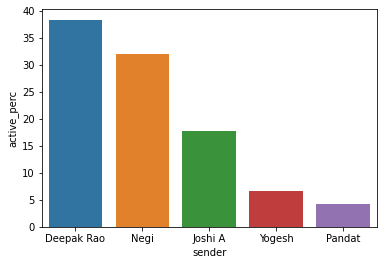

In [24]:
sbn.barplot(mostActiveUsersPer["sender"],mostActiveUsersPer["active_perc"])

In [25]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(df["messages"].str.cat(sep=" "))
 

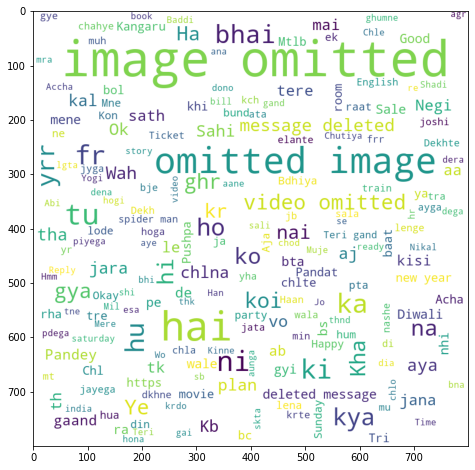

In [26]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)

In [27]:
### most used emoji

In [28]:
def getEmojiCount(data):
    emojis=[]
    for msg in data["messages"]:
       emojis.extend([m for m in msg if m in emoji.UNICODE_EMOJI["en"]])
       counters=Counter(emojis).most_common()
       emojidf=pd.DataFrame(counters,columns=["emoji","counts"])
    return emojidf

In [29]:
emoji_df=getEmojiCount(df[df["sender"]==sender])
emoji_df

,emoji,counts
0,😀,29
1,😂,6
2,🖕,4
3,🍺,2
4,❌,2
5,🪔,2
6,🤦,2
7,♂,2
8,🤟,2
9,💁,1


In [30]:
groupByYear=df.groupby("Year").count()["messages"]

In [31]:
groupByYear=groupByYear.reset_index()
groupByYear

,Year,messages
0,2017,2
1,2021,889
2,2022,181


In [32]:
groupBy=df.groupby(["Year","Month_num"]).count()["messages"]
groupBy=groupBy.reset_index()
groupBy

,Year,Month_num,messages
0,2017,5,2
1,2021,1,45
2,2021,2,4
3,2021,3,28
4,2021,4,7
5,2021,5,39
6,2021,6,2
7,2021,7,49
8,2021,8,62
9,2021,9,45


In [33]:
df_sort=df.sort_values(["Year","Month_num"])
df_group=df_sort.groupby(["Year","Month_name"]).count()


In [34]:
df_group=df_group.reset_index()
df_group.head()

,Year,Month_name,messages,date,sender,Month_num,Day,Minute,Hour,Day_Name,Only_date
0,2017,May,2,2,2,2,2,2,2,2,2
1,2021,April,7,7,7,7,7,7,7,7,7
2,2021,August,62,62,62,62,62,62,62,62,62
3,2021,December,231,231,231,231,231,231,231,231,231
4,2021,February,4,4,4,4,4,4,4,4,4


In [35]:
time=[]
for i in range(df_group.shape[0]):
  time.append(str(df_group["Month_name"][i])+"-"+str(df_group["Year"][i]))

In [36]:
df_group["time"]=time

In [37]:
df_group.head()

,Year,Month_name,messages,date,sender,Month_num,Day,Minute,Hour,Day_Name,Only_date,time
0,2017,May,2,2,2,2,2,2,2,2,2,May-2017
1,2021,April,7,7,7,7,7,7,7,7,7,April-2021
2,2021,August,62,62,62,62,62,62,62,62,62,August-2021
3,2021,December,231,231,231,231,231,231,231,231,231,December-2021
4,2021,February,4,4,4,4,4,4,4,4,4,February-2021


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

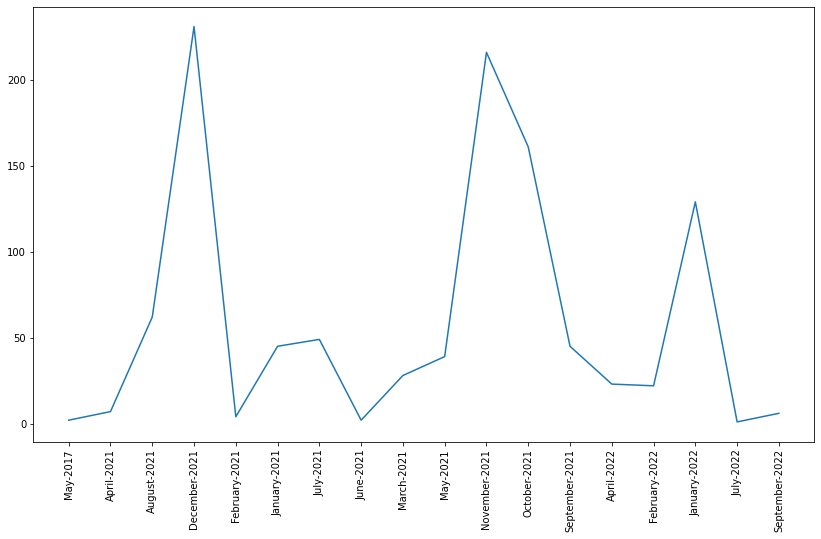

In [38]:
plt.figure(figsize=(14,8))
plt.plot(df_group["time"],df_group["messages"])
plt.xticks(rotation="vertical")

In [54]:
#Top Active Days
activedays=df["Day_Name"].value_counts().head().reset_index()
activedays.columns=["Day","Count"]
activedays

,Day,Count
0,Friday,322
1,Thursday,195
2,Sunday,195
3,Tuesday,121
4,Saturday,87


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


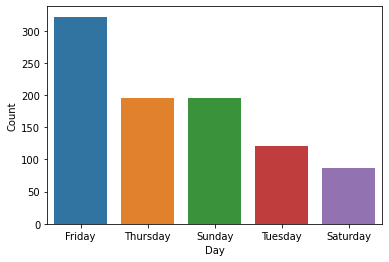

In [55]:
sbn.barplot(activedays["Day"],activedays["Count"])

In [56]:
#Top Active Months
activeMonths=df["Month_name"].value_counts().head().reset_index()
activeMonths.columns=["Months","Count"]
activeMonths

,Months,Count
0,December,231
1,November,216
2,January,174
3,October,161
4,August,62


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


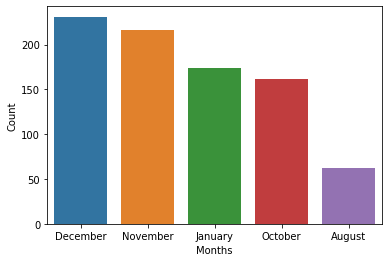

In [57]:
sbn.barplot(activeMonths["Months"],activeMonths["Count"])